# 🧥 Image Classification with Logistic Regression - FashionMNIST

In this session, we’ll build a logistic regression model using PyTorch to classify grayscale clothing images from the FashionMNIST dataset.

### 🔍 What You'll Learn:
- How image data is represented as tensors
- How to use `torchvision.datasets` and `DataLoader`
- Defining a logistic regression model for multi-class classification
- Using CrossEntropy loss function
- Evaluating model accuracy


## 📦 Step 1: Import Required Libraries


In [1]:
# 📦 Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


## 🧾 Step 2: Load and Explore the FashionMNIST Dataset

FashionMNIST contains 28x28 grayscale images of clothes belonging to 10 classes. We'll load it using `torchvision.datasets`.


In [3]:
# 🧾 Load the dataset
transform = transforms.ToTensor()
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000)


100.0%
100.0%
100.0%
100.0%


## 🖼️ Step 3: Visualize Sample Images


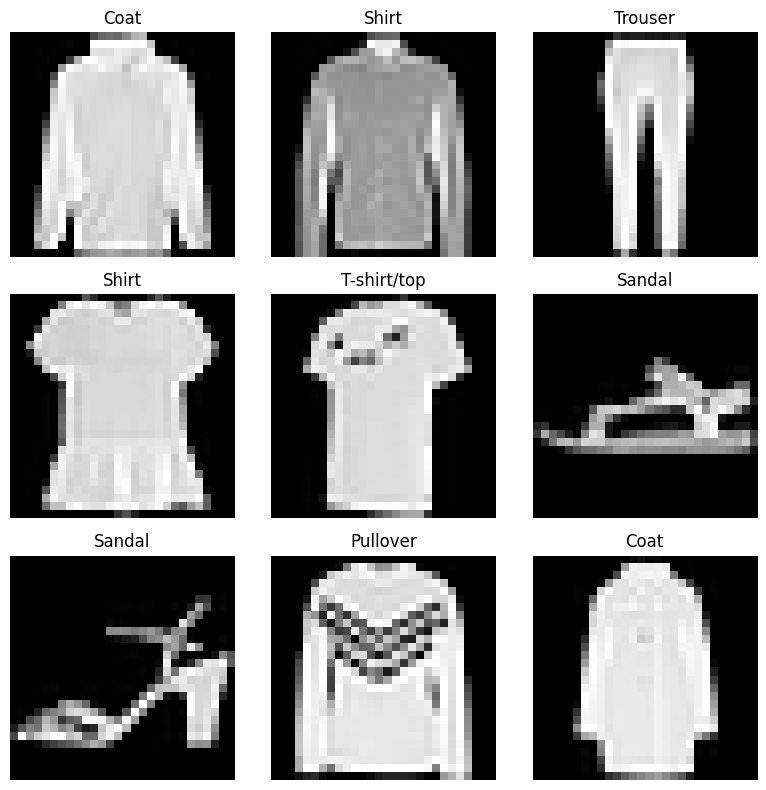

In [4]:
# 🖼️ Visualize sample images
classes = train_data.classes

def show_batch(images, labels):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(iter(train_loader))
show_batch(images, labels)


## 🧠 Step 4: Define the Logistic Regression Model

Since each image is 28x28 = 784 pixels, and there are 10 output classes, we'll use a single linear layer from 784 → 10.


In [5]:
# 🧠 Define logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10)  # 784 → 10

    def forward(self, x):
        x = x.view(-1, 28*28)  # flatten
        return self.linear(x)

model = LogisticRegressionModel()
print(model)


LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


## ⚙️ Step 5: Define Loss Function and Optimizer

We'll use `nn.CrossEntropyLoss()` which combines `LogSoftmax` and `NLLLoss`.


In [6]:
# ⚙️ Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


## 🚀 Step 6: Train the Model


In [9]:
# 🚀 Train the model
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.4408
Epoch 2, Loss: 0.4354
Epoch 3, Loss: 0.4292
Epoch 4, Loss: 0.4257
Epoch 5, Loss: 0.4212
Epoch 6, Loss: 0.4207
Epoch 7, Loss: 0.4163
Epoch 8, Loss: 0.4150
Epoch 9, Loss: 0.4126
Epoch 10, Loss: 0.4113


## 📈 Step 7: Evaluate Accuracy on Test Set


In [10]:
# 📈 Evaluate accuracy on test set
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 84.01%


## 🔍 Step 8: Visualize Predictions


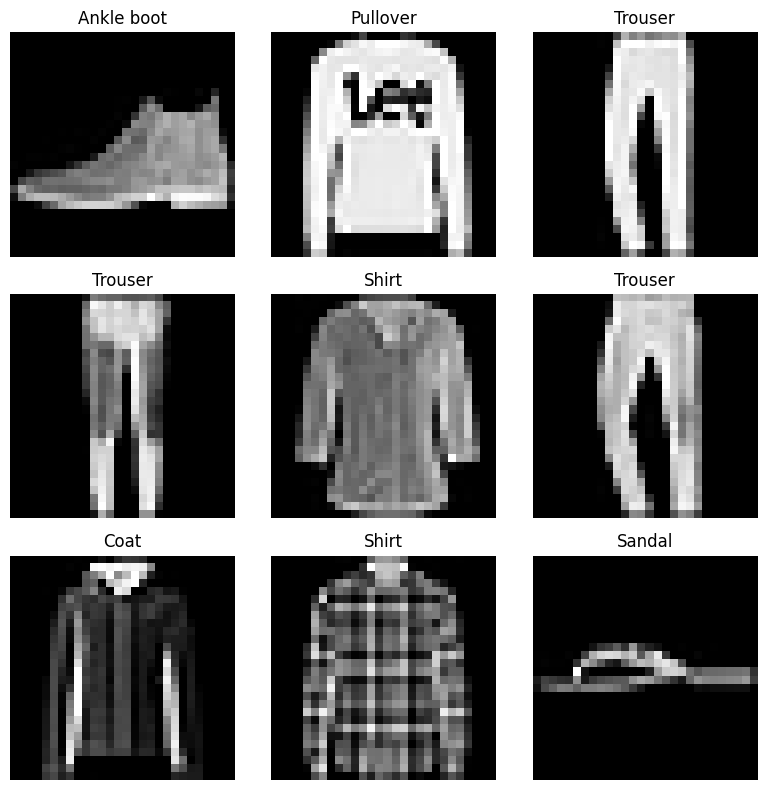

In [11]:
# 🔍 Visualize predictions
images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

show_batch(images, preds)


## ✅ Summary

- Used FashionMNIST dataset for multi-class classification  
- Built a logistic regression model with 784 input and 10 output units  
- Trained with CrossEntropyLoss and SGD  
- Evaluated accuracy and visualized predictions  
